In [216]:
%matplotlib inline
from bs4 import BeautifulSoup
import requests
import pandas as pd

# Notes on gas prices

1. Gather data for nominal price of gas standardize on year price
2. Claning and transforming
3. Adjust prices for inflation (CPI)   x/pog Today = cpiThen/cpiToday
4. Graph the nominal and adjusted prices
5. Choosther item with hitorical prices to compare to gas

# Format of out output

Thesult will be a dictionary with two keys: **year** and **price**

    {'year':[1949,1950,...],'price'[.28,.32,...]}

In [151]:
r = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text, "lxml")

In [152]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [153]:
allrows = soup.find_all("tr")

In [169]:
allrows[66] #UN.BEGIN:END L.BEGIN:END 4:31 32:66

<tr>
<td colspan="1">2011</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
3.527</td>
<td colspan="1">
3.111</td>
<td colspan="1">
3.792</td>
<td colspan="1">
3.345</td>
<td colspan="1">
3.577</td>
<td colspan="1">
3.155</td>
<td colspan="1">
3.476</td>
<td colspan="1">
3.616</td>
<td colspan="1">
3.521</td>
<td colspan="1">
3.840</td>
</tr>

In [155]:
onerow = allrows[30].find_all('td') #THIS GETS US ALL THE YEARS WE WANT LEADED
#[0] will contain the year, [1] is nominal
print(onerow[1])

<td colspan="1">
.567</td>


In [226]:
nomGasPrices = {'year':[],'price':[]}

for row in allrows:
    currentRow = row.find_all('td')
    
    currentYear=currentRow[0].get_text()
    
    if currentYear.isdigit():
        if int(currentYear)< 1990:
            #strips off everything but digit and .
            currentPrice = "".join([c for c in currentRow[1].get_text() if c.isdigit() or c == '.'])
            
            nomGasPrices['year'].append(int(currentYear))
            nomGasPrices['price'].append(float(currentPrice))
        
        elif int(currentYear) >= 1990:
            currentPrice = "".join([c for c in currentRow[3].get_text() if c.isdigit() or c == '.'])
            
            nomGasPrices['year'].append(int(currentYear))
            nomGasPrices['price'].append(float(currentPrice))


In [223]:
rawdata = {'year':[],'price':[]}
allrows = soup.find_all('tr')
for row in allrows[4:4+2011-1949+1]:
    el = row.find_all('td')
    year = el[0].contents[0]
    if year < '1990':
        price = el[1].contents[-1]
    else:
        price = el[3].contents[-1]
    
    rawdata['year'].append(int(year))
    rawdata['price'].append(float(price))

In [200]:
nomGasPrices

{'price': ['0.268',
  '.268',
  '.272',
  '.274',
  '.287',
  '.290',
  '.291',
  '.299',
  '.310',
  '.304',
  '.305',
  '.311',
  '.308',
  '.306',
  '.304',
  '.304',
  '.312',
  '.321',
  '.332',
  '.337',
  '.348',
  '.357',
  '.364',
  '.361',
  '.388',
  '.532',
  '.567',
  '.590',
  '.622',
  '.627',
  '.857',
  '1.191',
  '1.311',
  '1.222',
  '1.158',
  '1.129',
  '1.115',
  '.857',
  '.897',
  '.900',
  '.997',
  '1.164',
  '1.140',
  '1.127',
  '1.108',
  '1.112',
  '1.147',
  '1.231',
  '1.234',
  '1.059',
  '1.165',
  '1.510',
  '1.461',
  '1.358',
  '1.591',
  '1.880',
  '2.295',
  '2.589',
  '2.801',
  '3.266',
  '2.350',
  '2.788',
  '3.527'],
 'year': ['1949',
  '1950',
  '1951',
  '1952',
  '1953',
  '1954',
  '1955',
  '1956',
  '1957',
  '1958',
  '1959',
  '1960',
  '1961',
  '1962',
  '1963',
  '1964',
  '1965',
  '1966',
  '1967',
  '1968',
  '1969',
  '1970',
  '1971',
  '1972',
  '1973',
  '1974',
  '1975',
  '1976',
  '1977',
  '1978',
  '1979',
  '1980',
  '

# Put into pandas

In [227]:
df = pd.DataFrame(nomGasPrices)
df.head(10)

,price,year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


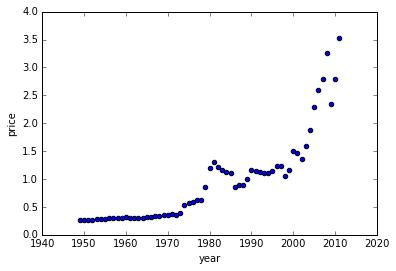

In [228]:
df.plot(x='year', y='price', kind='scatter')

# Reading from excel, gas prices over 12 months

In [233]:
#pd.read_excel?
cpi = pd.read_excel('cpi_data.xlsx',skiprows=range(9),header=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN


In [236]:
cols = list(cpi)
cols.remove('Year')
cols.remove('HALF1')
cols.remove('HALF2')
cols

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [243]:
cpi[cols].head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2
1,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8
2,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9
3,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9
4,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5


In [246]:
cpi['YEAR'] = cpi[cols].mean(axis=1)
cpi.head()
#axis=0 is column, axis=1 is row, 
#cpi['YEAR'] stores in new column, year

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
0,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667
1,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333
2,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333
3,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333
4,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333


In [252]:
cpi = cpi.set_index(keys='Year')
cpi.head()

KeyError: 'Year'

In [253]:
cpi.ix[1972]

Jan      41.100000
Feb      41.300000
Mar      41.400000
Apr      41.500000
May      41.600000
Jun      41.700000
Jul      41.900000
Aug      42.000000
Sep      42.100000
Oct      42.300000
Nov      42.400000
Dec      42.500000
HALF1          NaN
HALF2          NaN
YEAR     41.816667
Name: 1972, dtype: float64

x/oldprice = nowCPI/oldCPI
x = (nowCPI/oldCPI) *oldprice

In [255]:
nowcpi = 238.78
oldcpi = 31.01

nowcpi/oldcpi * .03

0.23100290228958398

In [258]:
adj = df.merge(right=cpi,left_on='year', right_index=True)

In [261]:
adj['adj_price'] =adj.price * 238.78/adj.YEAR
adj.head()

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR,adj_price
15,0.304,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667,2.340326
16,0.312,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333,2.364434
17,0.321,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333,2.361439
18,0.332,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333,2.376466
19,0.337,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333,2.313432


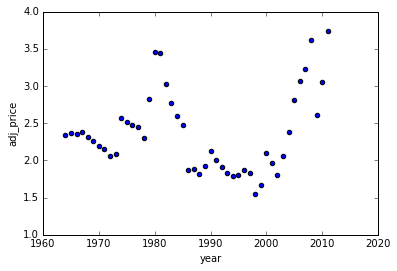

In [267]:
adj.plot(x='year', y='adj_price', kind='scatter')

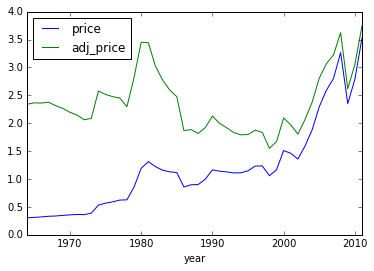

In [268]:
xx = adj[['price','adj_price']]
xx.index = adj.year
xx.plot()

In [271]:
fig = plt.figure()
ax = fig.add_sublot(111)
ax.plot(adj['year'], adj['price'], marker='+', color='b')
ax.plot(adj['year'], adj['adj_price'], marker='^',golor='g')
ax.set_ylabel('Price in $')
ax.set_xlabel('Year')
ax.set_title('Compare Price of Gas')

NameError: name 'plt' is not defined

In [277]:
adj.to_excel()
#turns file into another form

<bound method NDFrame.to_json of     price  year      Jan      Feb      Mar      Apr      May      Jun  \
15  0.304  1964   30.900   30.900   30.900   30.900   30.900   31.000   
16  0.312  1965   31.200   31.200   31.300   31.400   31.400   31.600   
17  0.321  1966   31.800   32.000   32.100   32.300   32.300   32.400   
18  0.332  1967   32.900   32.900   33.000   33.100   33.200   33.300   
19  0.337  1968   34.100   34.200   34.300   34.400   34.500   34.700   
20  0.348  1969   35.600   35.800   36.100   36.300   36.400   36.600   
21  0.357  1970   37.800   38.000   38.200   38.500   38.600   38.800   
22  0.364  1971   39.800   39.900   40.000   40.100   40.300   40.600   
23  0.361  1972   41.100   41.300   41.400   41.500   41.600   41.700   
24  0.388  1973   42.600   42.900   43.300   43.600   43.900   44.200   
25  0.532  1974   46.600   47.200   47.800   48.000   48.600   49.000   
26  0.567  1975   52.100   52.500   52.700   52.900   53.200   53.600   
27  0.590  1976   

In [272]:
res = requests.get("http://www.randomuseless.info/gasprice/gasprice.txt")